REGRESSION ANALYSIS

> Linear approximation of causal relaitonship between two or more variables

Y                 --> Dependant variable (Predicted)

x1, x2, x3,...xn   --> Independant Variable(s) (Predictors)

# Y = F(x1, x2, x3 .... xn)



Simple Linear Regression model :

Y = a0 + a1*x1 + Error

=> y^ = a + bx (on average error is zero)

### Difference between Correlation and Regression :
> Corelation does not cause Causation!

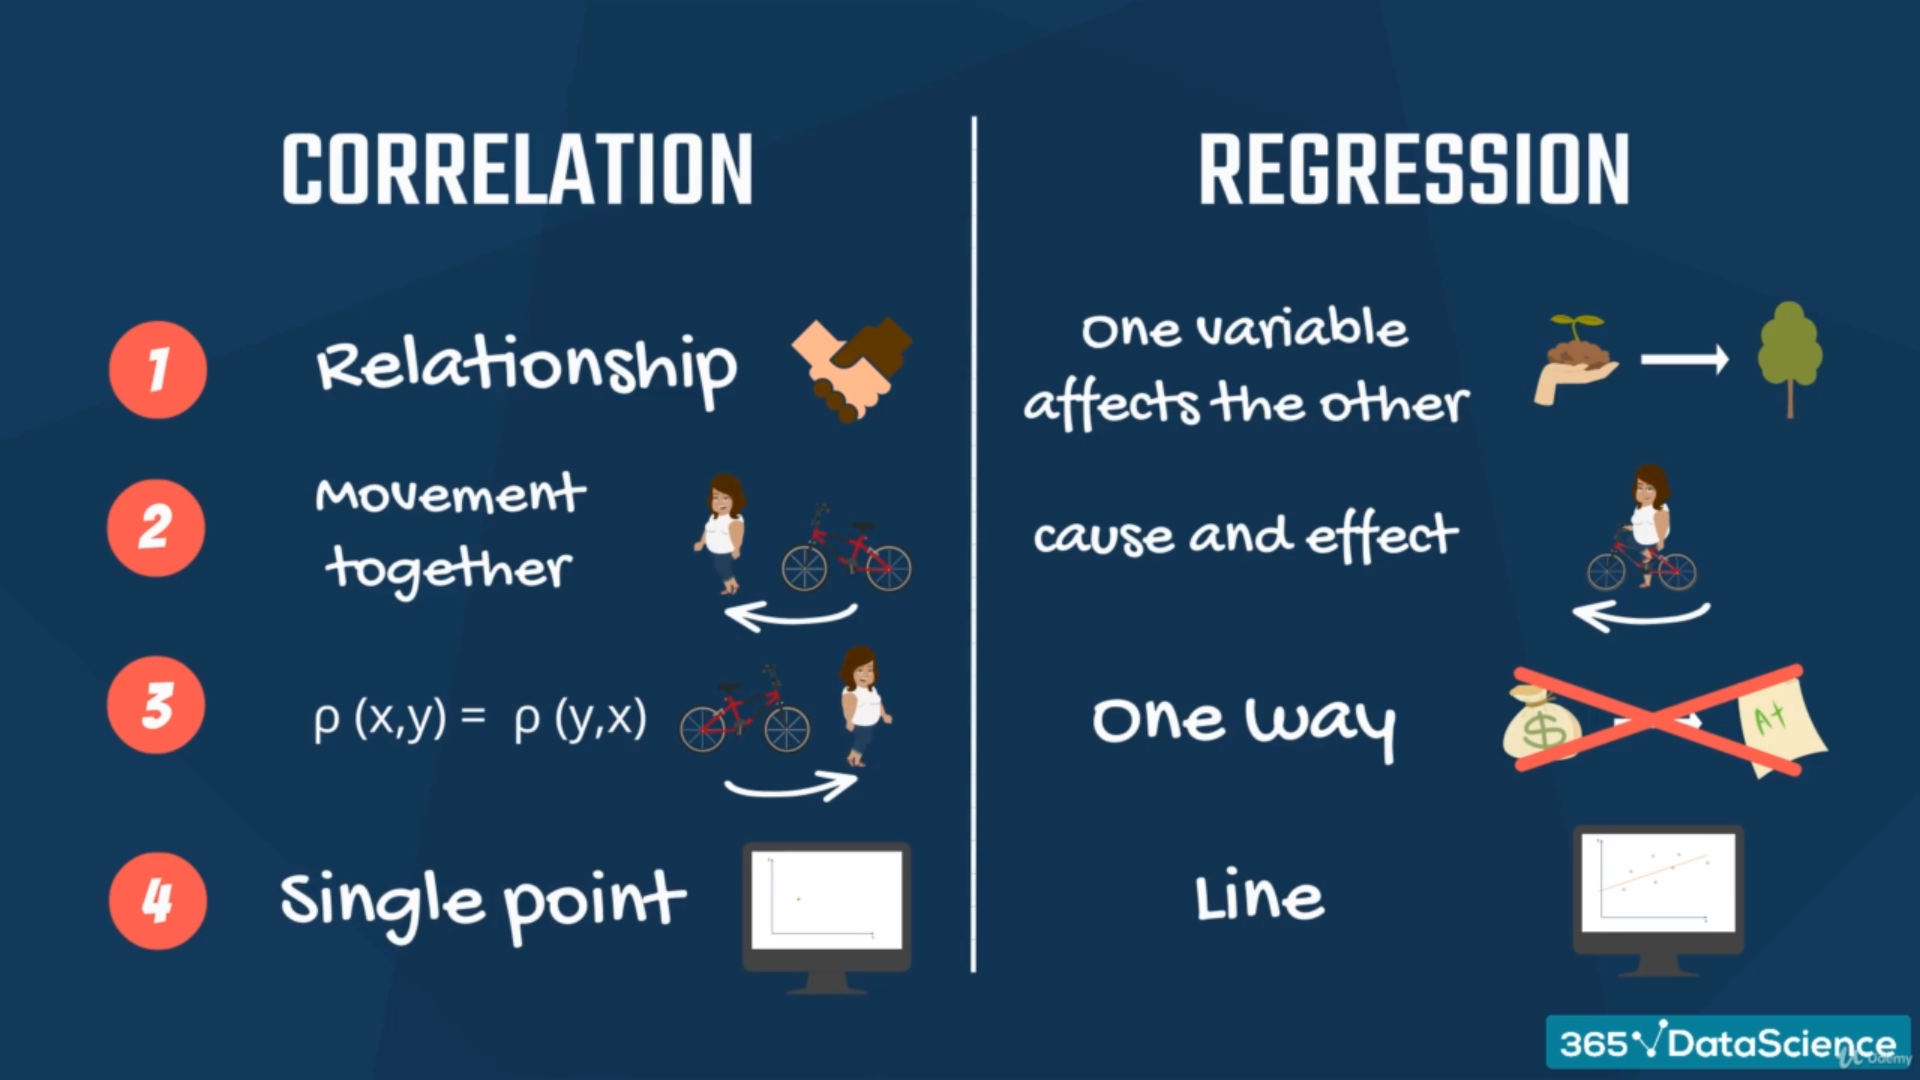

In [5]:
#relevant libs

In [34]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm #provide good extra statistical inferences related to regression models

in conda prompt type the following to list all available packages
>conda list

if package is not present, install it using :
>conda install [package-name]

## Load data

In [14]:
dataset = pd.read_csv('./USA_Housing.csv')

In [20]:
dataset

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0          79545.45857             5.682861                   7.009188   
1          79248.64245             6.002900                   6.730821   
2          61287.06718             5.865890                   8.512727   
3          63345.24005             7.188236                   5.586729   
4          59982.19723             5.040555                   7.839388   
5          80175.75416             4.988408                   6.104512   
6          64698.46343             6.025336                   8.147760   
7          78394.33928             6.989780                   6.620478   
8          59927.66081             5.362126                   6.393121   
9          81885.92718             4.423672                   8.167688   
10         80527.47208             8.093513                   5.042747   
11         50593.69550             4.496513                   7.467627   
12         39033.80924             7.671755                   7.250029   
13         73163.66344             6.919535                   5.993188   
14         69391.38018             5.344776                   8.406418   
15         73091.86675             5.443156                   8.517513   
16         79706.96306             5.067890                   8.219771   
17         61929.07702             4.788550                   5.097010   
18         63508.19430             5.947165                   7.187774   
19         62085.27640             5.739411                   7.091808   
20         86294.99909             6.627457                   8.011898   
21         60835.08998             5.551222                   6.517175   
22         64490.65027             4.210323                   5.478088   
23         60697.35154             6.170484                   7.150537   
24         59748.85549             5.339340                   7.748682   
25         56974.47654             8.287562                   7.312880   
26         82173.62608             4.018525                   6.992699   
27         64626.88098             5.443360                   6.988754   
28         90499.05745             6.384359                   4.242191   
29         59323.79210             6.977828                   8.273697   
...                ...                  ...                        ...   
4970       55980.20481             7.014510                   5.458789   
4971       73491.13443             5.784430                   4.425959   
4972       83695.27238             7.643507                   7.127219   
4973       78743.75927             6.583685                   6.595683   
4974       70720.29646             6.411801                   5.048128   
4975       54037.58088             8.471765                   6.966072   
4976       75046.31379             5.351169                   7.797825   
4977       75980.43884             6.583105                   5.914892   
4978       80393.33950             8.899713                   5.652974   
4979       82224.69501             5.434087                   8.375708   
4980       75664.02448             5.789203                   6.415312   
4981       71663.87129             6.150745                   7.311907   
4982       58800.90877             5.976507                   7.304051   
4983       69655.18395             7.721100                   6.077795   
4984       62623.35983             5.071624                   6.771015   
4985       75117.04295             6.036275                   6.538111   
4986       71060.40601             5.718839                   7.222730   
4987       65729.22233             6.237787                   6.860475   
4988       67637.84067             7.056673                   5.774409   
4989       47965.40690             5.694638                   7.363327   
4990       52723.87656             5.452237                   8.124571   
4991       74102.19189             5.657841                   7.683993   
4992      

# DATASET CLEANING FOR UNIVARIATE REGRESSION

In [22]:

data1 = dataset.drop(axis=1, labels=['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Bedrooms', 'Area Population', 'Address'])

In [23]:
data1.describe()

Avg. Area Number of Rooms         Price
count                5000.000000  5.000000e+03
mean                    6.987792  1.232073e+06
std                     1.005833  3.531176e+05
min                     3.236194  1.593866e+04
25%                     6.299250  9.975771e+05
50%                     7.002902  1.232669e+06
75%                     7.665871  1.471210e+06
max                    10.759588  2.469066e+06

# CREATE UNIVARIATE REGRESSION

y^ = a0 + a1*x1

### Defining independant and dependant vars

In [27]:
x1 = data1['Avg. Area Number of Rooms']
y = data1['Price']

In [25]:
x1.head()

0    7.009188
1    6.730821
2    8.512727
3    5.586729
4    7.839388
Name: Avg. Area Number of Rooms, dtype: float64

In [28]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

### Exploring data

In [30]:
#scatter plots

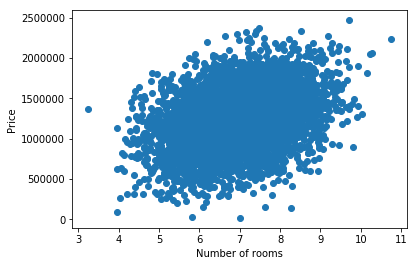

In [35]:
plt.scatter(x1, y)
plt.xlabel('Number of rooms', fontsize=10)
plt.ylabel('Price', fontsize=10)
plt.show()

### Regression : Ordinary Least Square Regression (OLS)


>y^ = a0 + a1*x1

should be written as :
>y^ = a0*x1 + a1 *x1

where x1 = 1

In [37]:
#add_constant does the above job
x = sm.add_constant(x1)
model = sm.OLS(y,x).fit()

In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     634.6
Date:                Tue, 16 Apr 2019   Prob (F-statistic):          6.17e-132
Time:                        13:45:21   Log-Likelihood:                -70668.
No. Observations:                5000   AIC:                         1.413e+05
Df Residuals:                    4998   BIC:                         1.414e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      4.086e+05    3.3e+04     12.373      0.000    3.44e+05    4.73e+05
Avg. Area Number of Rooms  1.178e+05   4677.758     25.192      0.000    1.09e+05    1.27e+05
==============================================================================
Omnibus:                        0.684   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.710   Jarque-Bera (JB):                0.725
Skew:                           0.005   Prob(JB):                        0.696
Kurtosis:                       2.942   Cond. No.                         50.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Plotting the line on same scatter plot

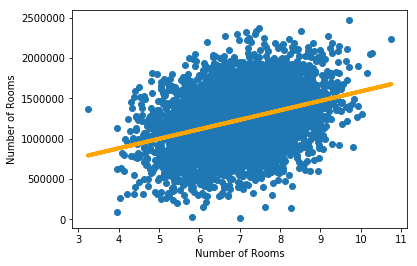

In [43]:
plt.scatter(x1,y)
yhat = 4.086e+05 + 1.178e+05*x1
fig = plt.plot(x1, yhat, lw = 4, c='orange')
plt.xlabel('Number of Rooms', fontsize=10)
plt.ylabel('Number of Rooms', fontsize=10)
plt.show()

# Plotting using seaborn
seaborn is a package made on top of matplotlib

>sns.set()

the above command when written on top, overrides all matplotlib plots with its own

In [44]:
sns.set()

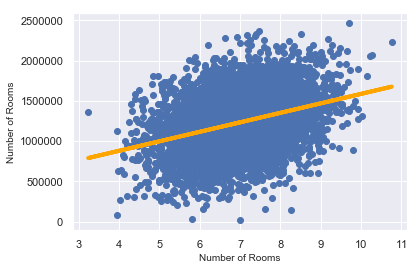

In [45]:
plt.scatter(x1,y)
yhat = 4.086e+05 + 1.178e+05*x1
fig = plt.plot(x1, yhat, lw = 4, c='orange')
plt.xlabel('Number of Rooms', fontsize=10)
plt.ylabel('Number of Rooms', fontsize=10)
plt.show()

# Interpretting the model summary

In [46]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
=======================================================================================
Model:                     OLS                    Adj. R-squared:           0.112      
Dependent Variable:        Price                  AIC:                      141340.2551
Date:                      2019-04-16 13:59       BIC:                      141353.2895
No. Observations:          5000                   Log-Likelihood:           -70668.    
Df Model:                  1                      F-statistic:              634.6      
Df Residuals:              4998                   Prob (F-statistic):       6.17e-132  
R-squared:                 0.113                  Scale:                    1.1067e+11 
---------------------------------------------------------------------------------------
                             Coef.     Std.Err.     t    P>|t|     [0.025      0.975]  
---------------------------------------------------------------------------------------
const                     408619.8194 33024.0194 12.3734 0.0000 343878.2523 473361.3865
Avg. Area Number of Rooms 117841.6376  4677.7577 25.1919 0.0000 108671.1802 127012.0950
---------------------------------------------------------------------------------------
Omnibus:                      0.684               Durbin-Watson:                  2.005
Prob(Omnibus):                0.710               Jarque-Bera (JB):               0.725
Skew:                         0.005               Prob(JB):                       0.696
Kurtosis:                     2.942               Condition No.:                  51   
=======================================================================================

"""

In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     634.6
Date:                Tue, 16 Apr 2019   Prob (F-statistic):          6.17e-132
Time:                        13:59:15   Log-Likelihood:                -70668.
No. Observations:                5000   AIC:                         1.413e+05
Df Residuals:                    4998   BIC:                         1.414e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      4.086e+05    3.3e+04     12.373      0.000    3.44e+05    4.73e+05
Avg. Area Number of Rooms  1.178e+05   4677.758     25.192      0.000    1.09e+05    1.27e+05
==============================================================================
Omnibus:                        0.684   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.710   Jarque-Bera (JB):                0.725
Skew:                           0.005   Prob(JB):                        0.696
Kurtosis:                       2.942   Cond. No.                         50.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# It consists of THREE tables, 

1. MODEL SUMMARY
2. COEFFICIENT TABLE
3. TESTS

## Coeeficient table

#### std err : 
>shows error for each estimate

#### t       : 
>t-statistic

#### P>|t|   : 
>p value (HYPOTHESIS TESTING)
> if P-VALUE < 0.05, predicting variable is significant
        


# Determinants of a good regression - ANOVA

1. Sum of squares total
2. Sum of squares regression
3. Sum of squares error

## Sum of Tquares Total (SST or TSS)


sum of squared difference between
>observation and its mean

(dispersion of obsvn around the mean similar to variance)

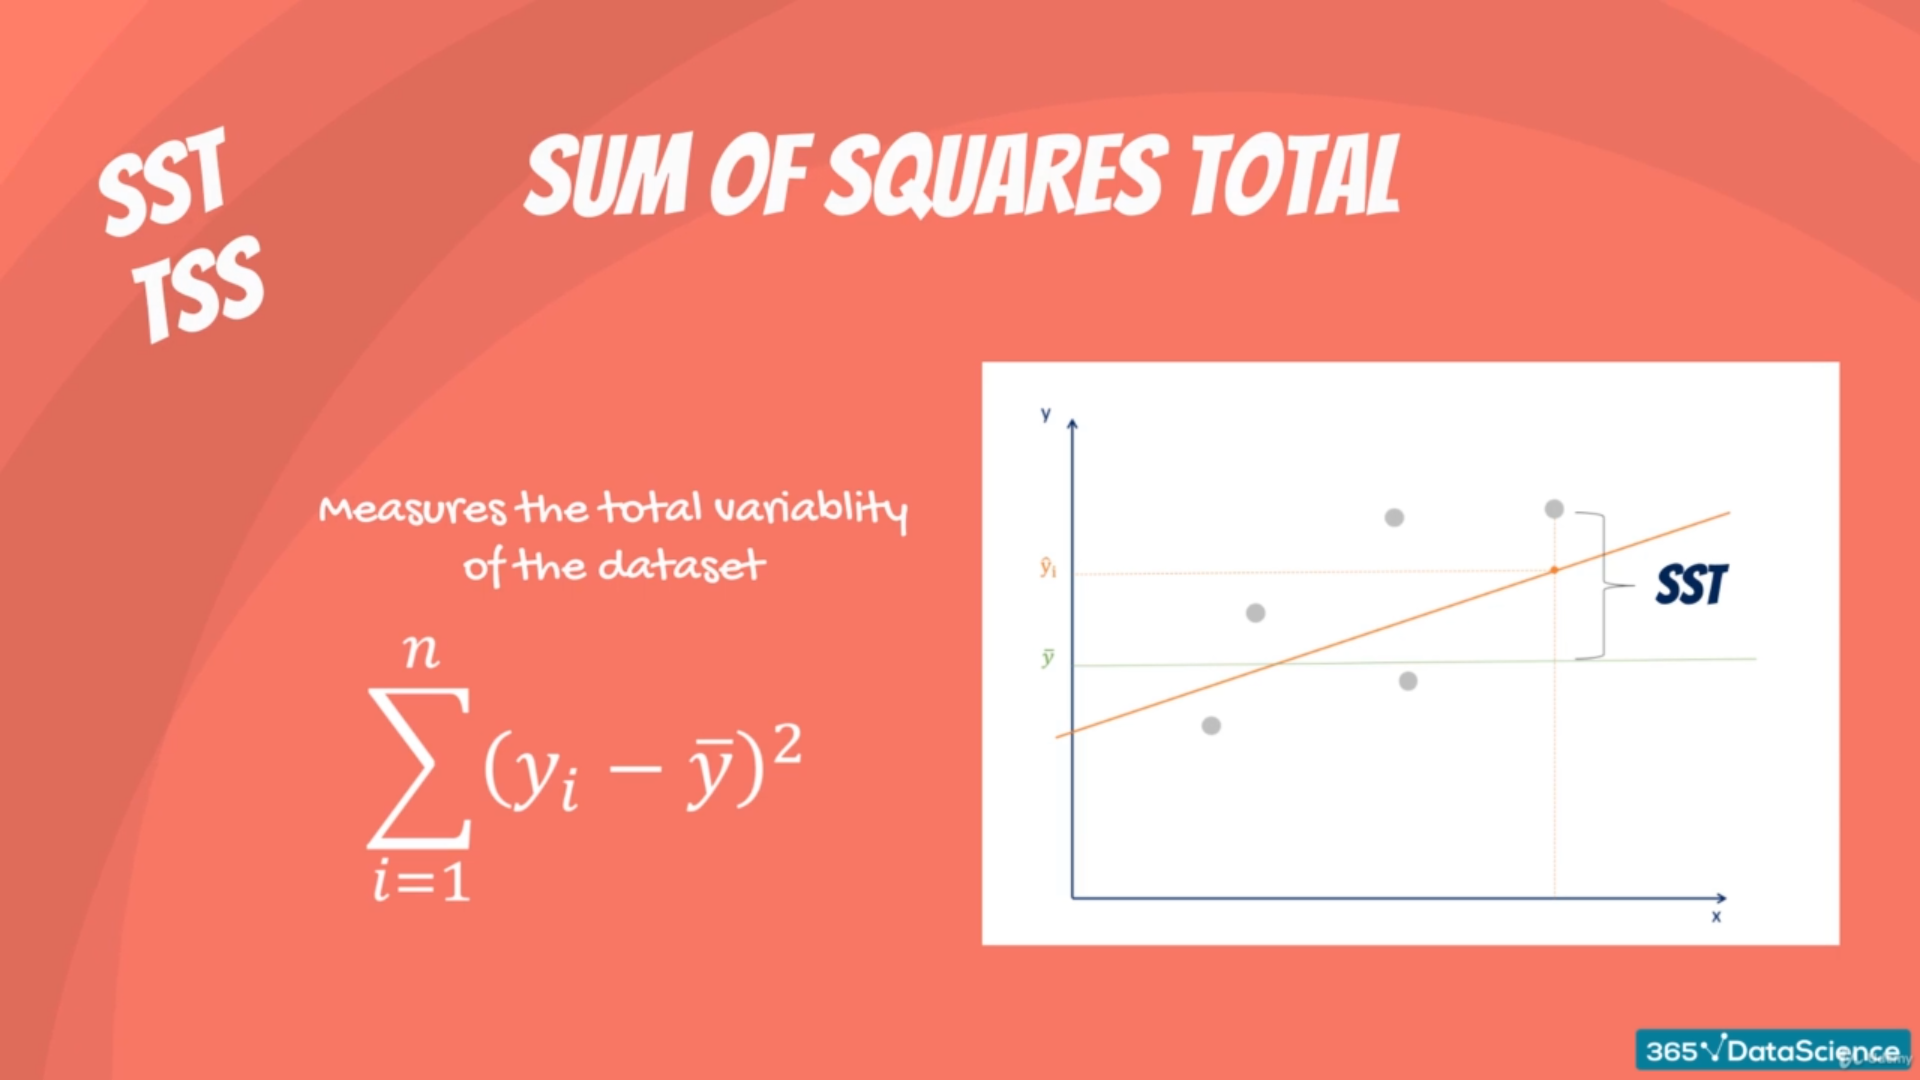

# Sum of Squared Regression(SSR) or Explain Sum of Squares (ESS)

sum of squared difference between
>Predicted value and its mean of dependant variable

-> Describes how well the line fits our data

-> if SSR = SST, Model captures all the observed variability and is perfect!

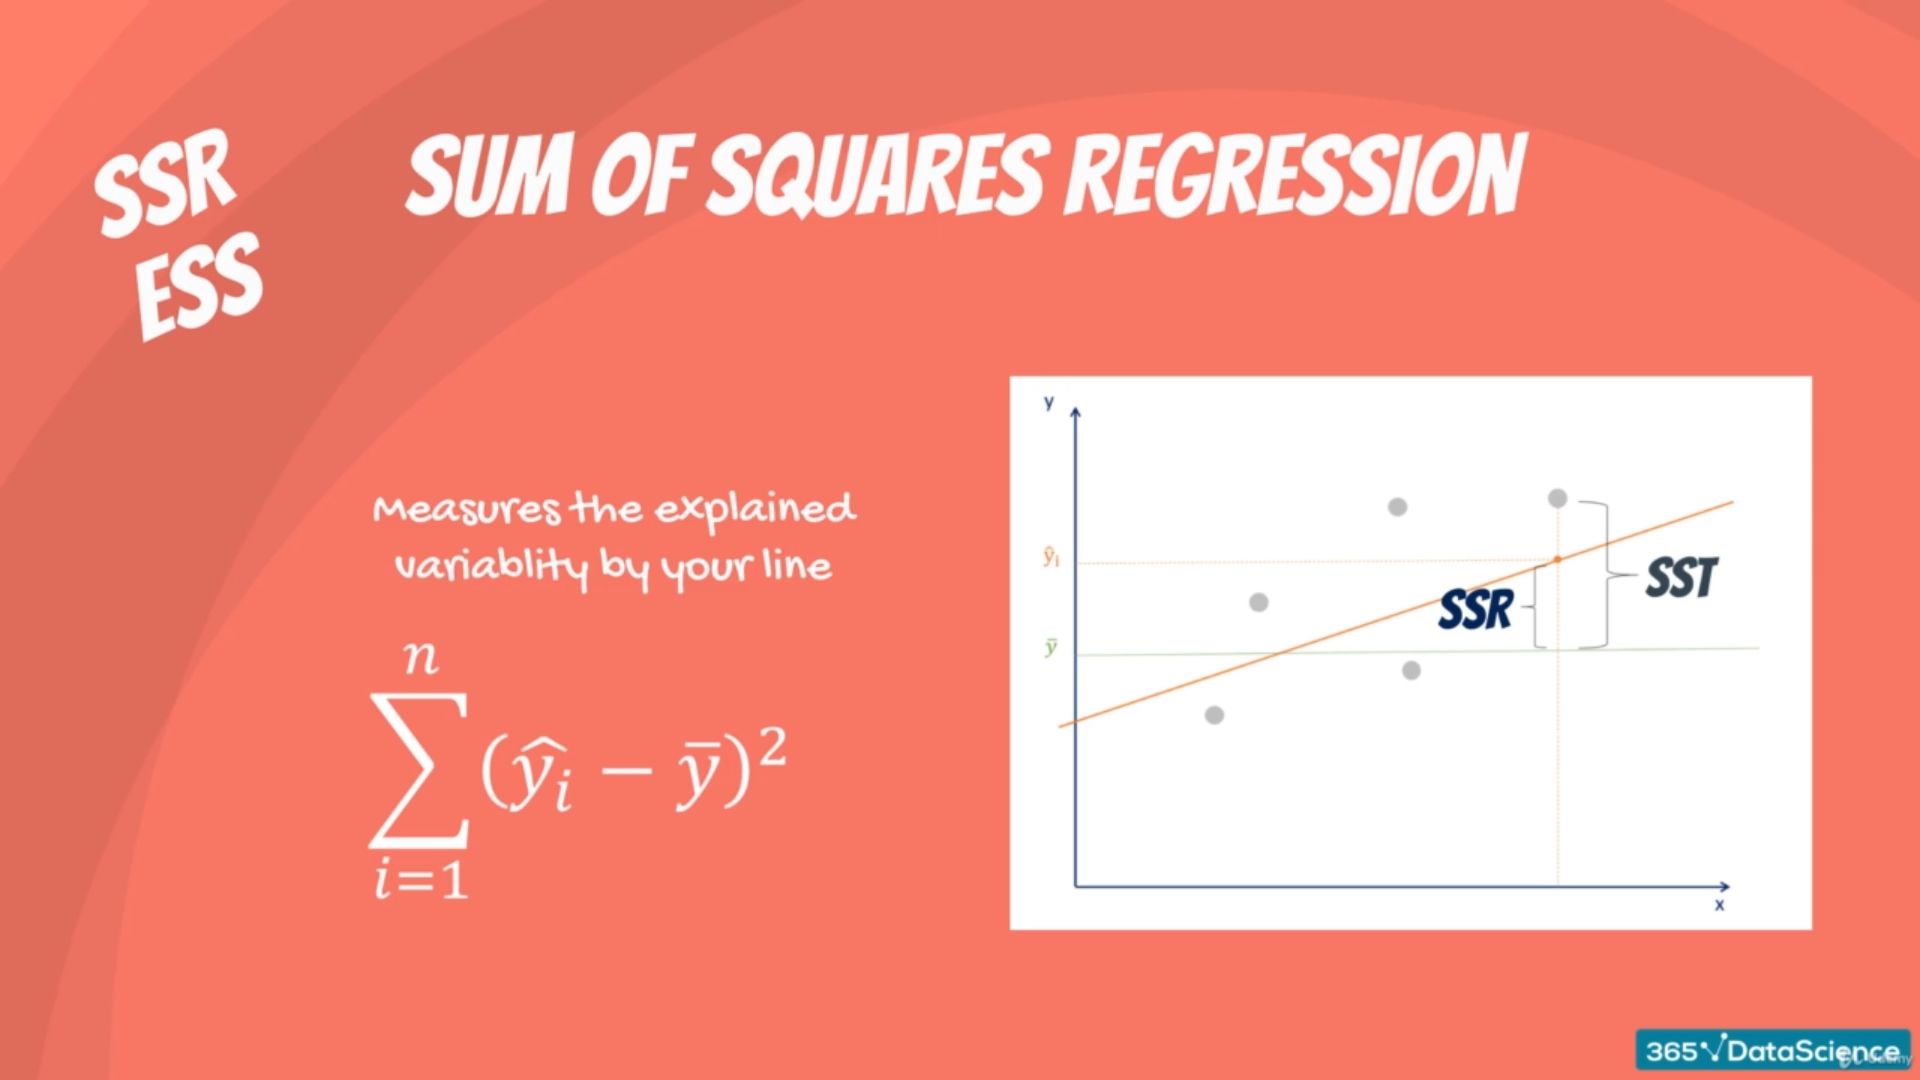

# Sum of squared errors (SSE) or Residual Sum of Squares (RSS)

sum of squared diffeence between:
> observed value and predicted valuse

--> smaller the error, bTter the model

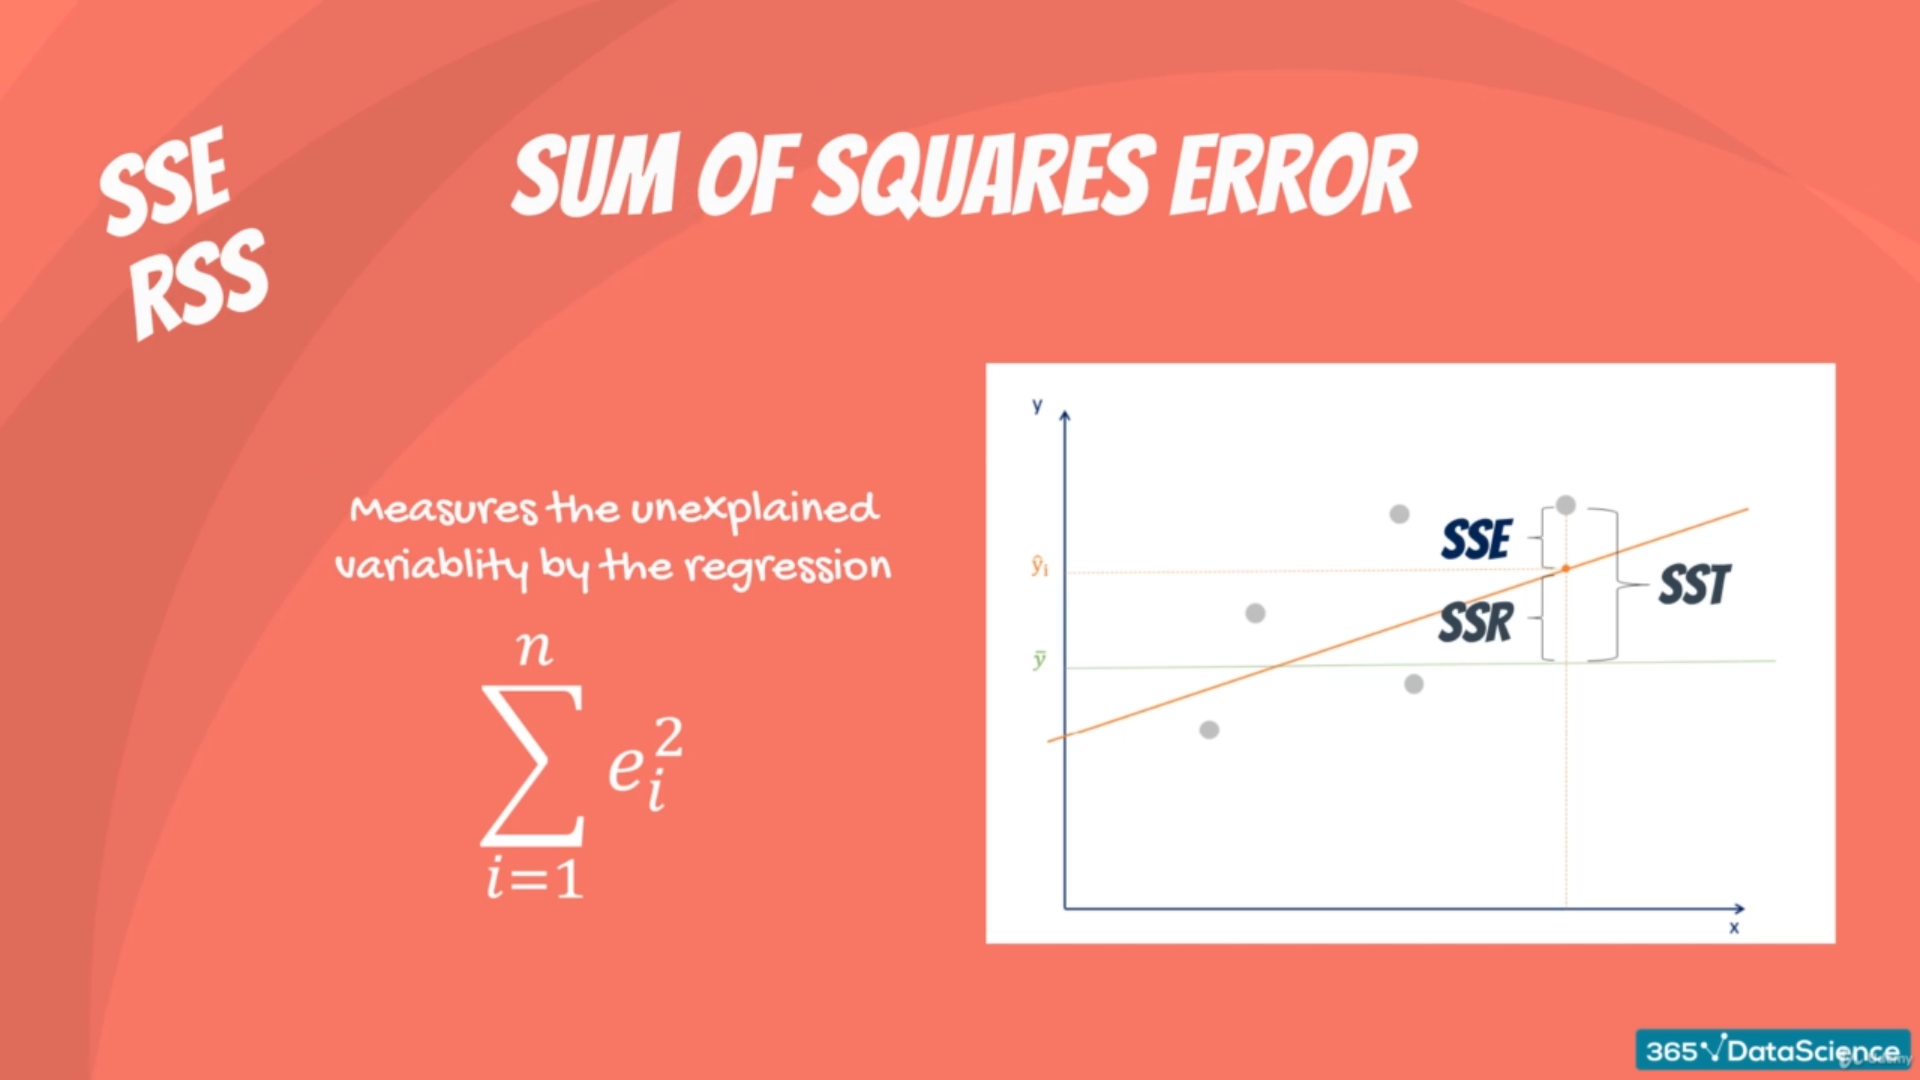

# Relation between the three


the mor
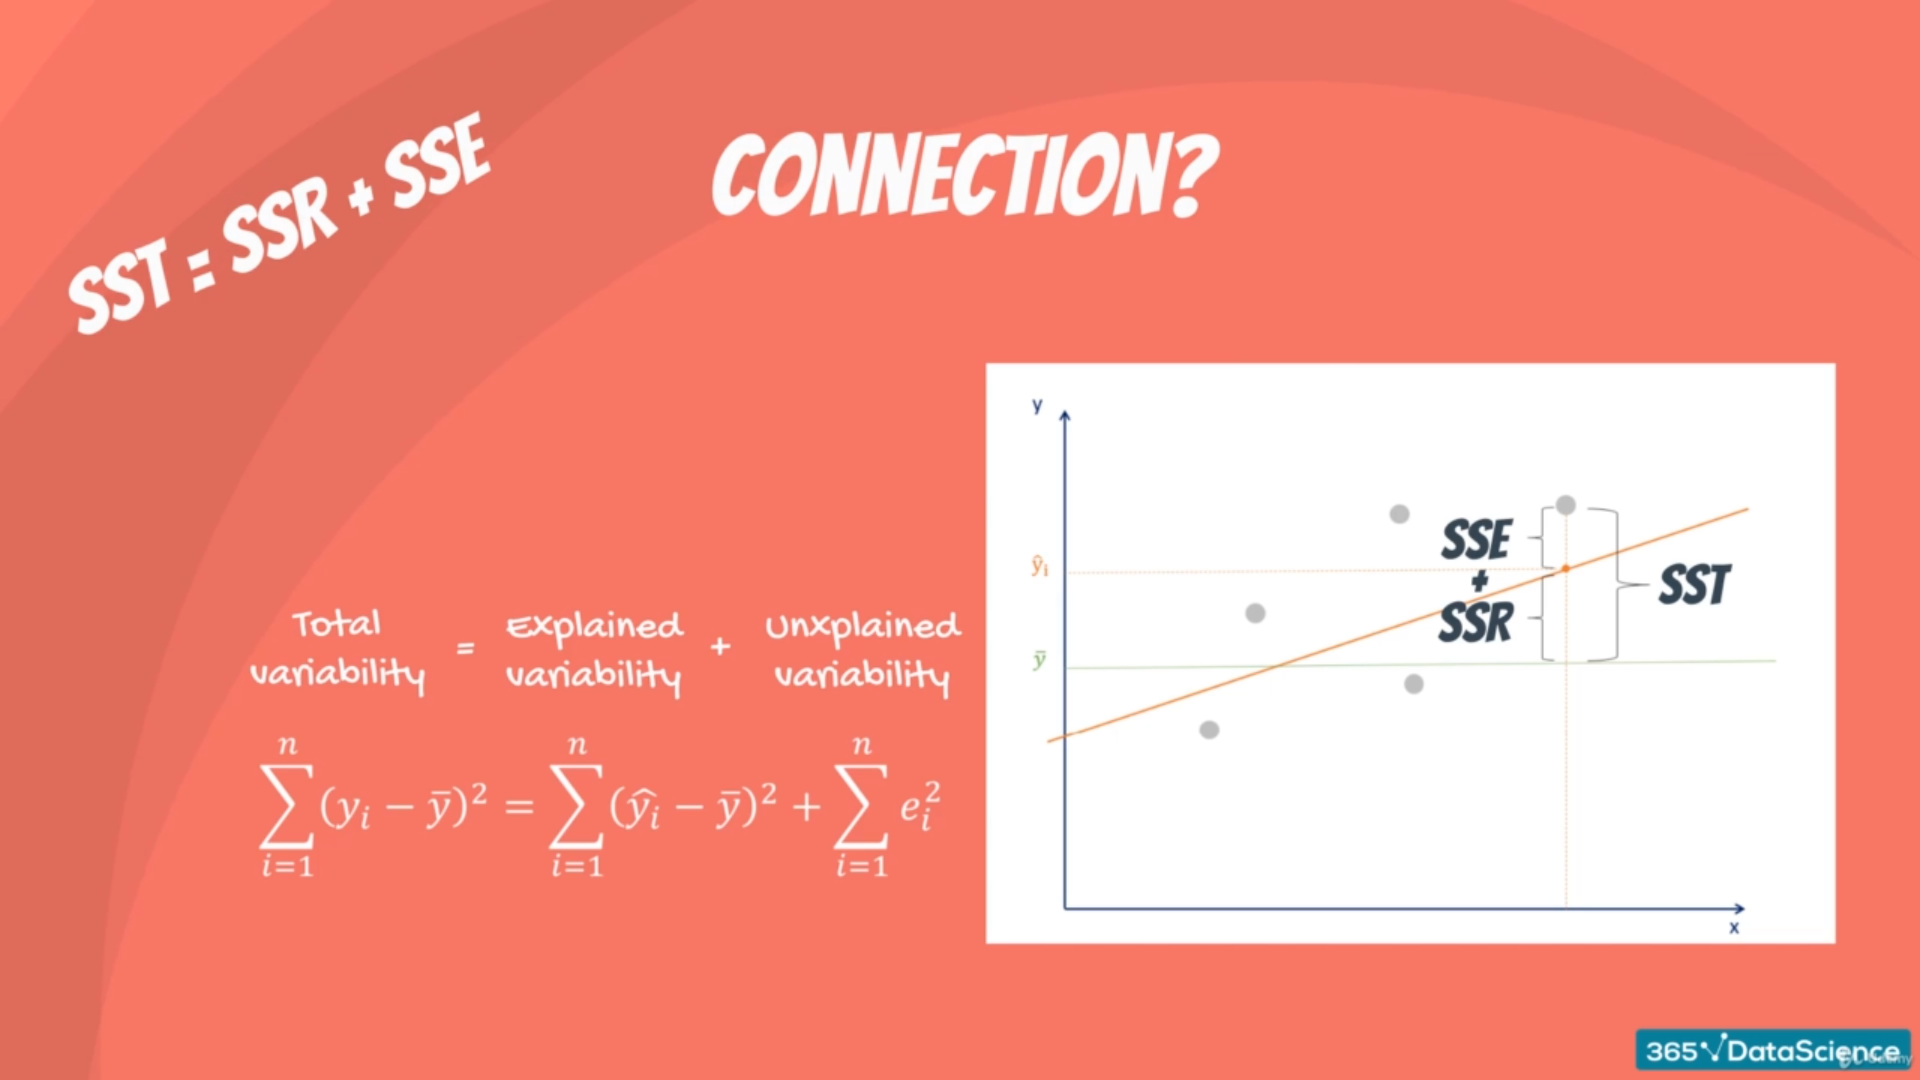

In [48]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
=======================================================================================
Model:                     OLS                    Adj. R-squared:           0.112      
Dependent Variable:        Price                  AIC:                      141340.2551
Date:                      2019-04-16 14:34       BIC:                      141353.2895
No. Observations:          5000                   Log-Likelihood:           -70668.    
Df Model:                  1                      F-statistic:              634.6      
Df Residuals:              4998                   Prob (F-statistic):       6.17e-132  
R-squared:                 0.113                  Scale:                    1.1067e+11 
---------------------------------------------------------------------------------------
                             Coef.     Std.Err.     t    P>|t|     [0.025      0.975]  
---------------------------------------------------------------------------------------
const                     408619.8194 33024.0194 12.3734 0.0000 343878.2523 473361.3865
Avg. Area Number of Rooms 117841.6376  4677.7577 25.1919 0.0000 108671.1802 127012.0950
---------------------------------------------------------------------------------------
Omnibus:                      0.684               Durbin-Watson:                  2.005
Prob(Omnibus):                0.710               Jarque-Bera (JB):               0.725
Skew:                         0.005               Prob(JB):                       0.696
Kurtosis:                     2.942               Condition No.:                  51   
=======================================================================================

"""

# R Squared Vaue

Important indicator to say how good our regression is
> lies between 0 - 1 but there is no rule of thumb that a fixed value is a good score

eg. in chem  .7 approx is considered fantastic and in social science .4 is considered fantastic

> R^2 = SSR /SST

R sq = 1 ---------> model explains entire variability
R sq = 0 ---------> model explains none of the variablity


### Here,

> Adj. R-squared:
0.112

as it is far from 1 and close to 0
> We are missing a huge deal of information!

Hence, add more dependant variables.. NOT SIMPLY ANYTHING but with CRITICAL THINKING!!!!! (eg Gender)

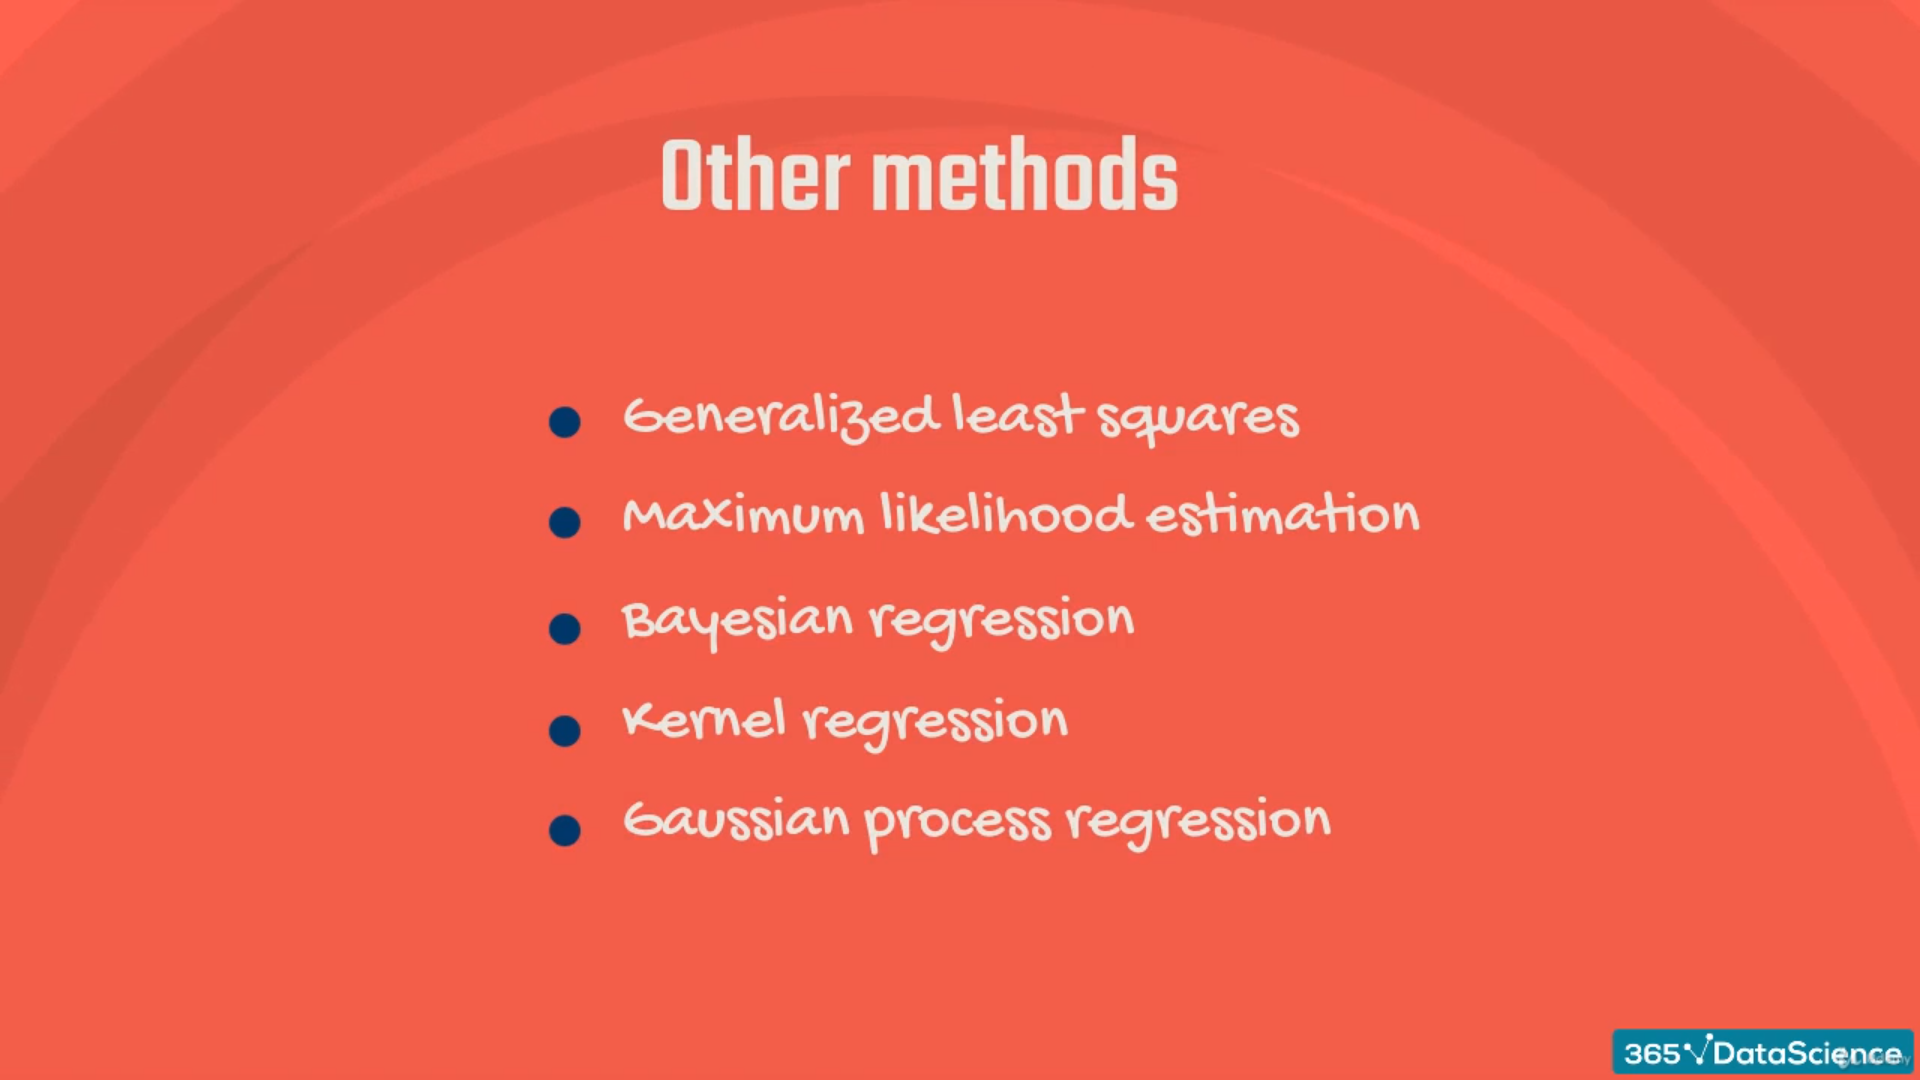

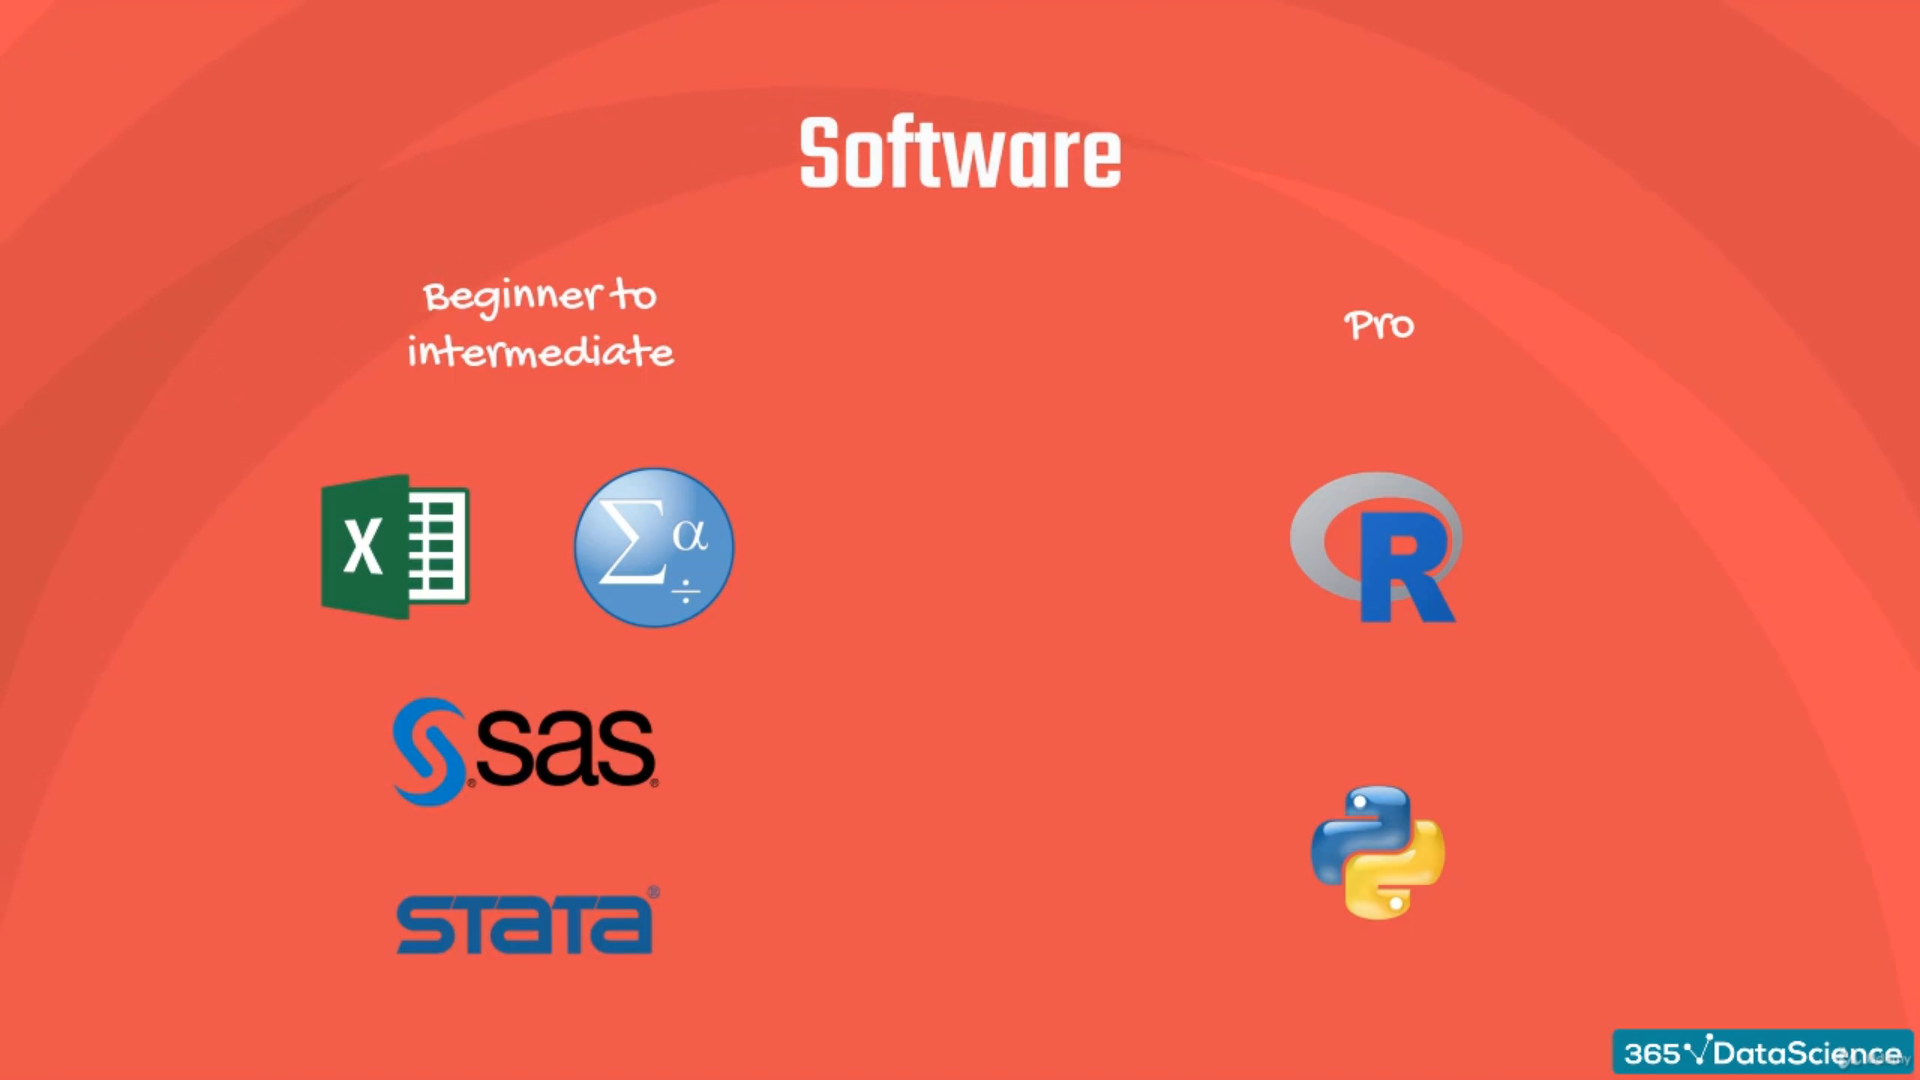